In [1]:
import pandas as pd

filename="results_matrix_scheduling"

df_matrix = pd.read_csv(filename + ".txt", sep=" ", header=None, names=["Programa", "Threads", "Tamaño entrada 1", "Tamaño entrada 2", "Tamaño entrada 3", "Tipo scheduling", "Tamaño chunk", "Tiempo de ejecución"])
df_matrix = df_matrix.drop("Programa", 1)
df_matrix

,Threads,Tamaño entrada 1,Tamaño entrada 2,Tamaño entrada 3,Tipo scheduling,Tamaño chunk,Tiempo de ejecución
0,1,2,2,3,1,10,0.000
1,1,2,2,3,1,50,0.000
2,1,2,2,3,1,100,0.000
3,1,2,2,3,1,500,0.000
4,1,2,2,3,1,1000,0.000
...,...,...,...,...,...,...,...
155995,50,1000,1500,2000,2,50,15.670
155996,50,1000,1500,2000,2,100,14.793
155997,50,1000,1500,2000,2,500,14.451
155998,50,1000,1500,2000,2,1000,14.483


In [2]:
df_matrix = df_matrix.groupby(["Threads", "Tamaño entrada 1", "Tamaño entrada 2", "Tamaño entrada 3", "Tipo scheduling", "Tamaño chunk"]).describe()
df_matrix = df_matrix[[("Tiempo de ejecución",  "mean"), ("Tiempo de ejecución",  "std")]]
df_matrix = df_matrix.rename(columns={"mean": "Promedio", "std": "Desvío estándar"})
df_matrix

Tiempo de ejecución  \
                                                                                                   Promedio   
Threads Tamaño entrada 1 Tamaño entrada 2 Tamaño entrada 3 Tipo scheduling Tamaño chunk                       
1       2                2                3                1               10                       0.00004   
                                                                           50                       0.00010   
                                                                           100                      0.00010   
                                                                           500                      0.00004   
                                                                           1000                     0.00000   
...                                                                                                     ...   
50      1000             1500             2000             2               50                      15.86640   
                                                                           100                     14.84650   
                                                                           500                     14.50990   
                                                                           1000                    14.50140   
                                                                           5000                    14.34360   

                                                                                                         
                                                                                        Desvío estándar  
Threads Tamaño entrada 1 Tamaño entrada 2 Tamaño entrada 3 Tipo scheduling Tamaño chunk                  
1       2                2                3                1               10                  0.000198  
                                                                           50                  0.000364  
                                                                           100                 0.000303  
                                                                           500                 0.000198  
                                                                           1000                0.000000  
...                                                                                                 ...  
50      1000             1500             2000             2               50                  0.125718  
                                                                           100                 0.073091  
                                                                           500                 0.070291  
                                                                           1000                0.077545  
                                                                           5000                0.084245  

[3600 rows x 2 columns]

In [3]:
df_matrix.columns = [" - ".join(a) for a in df_matrix.columns.to_flat_index()]
df_matrix = df_matrix.reset_index()

In [4]:
df_matrix_filtered = df_matrix[((df_matrix["Threads"] & df_matrix["Threads"] - 1) == 0)]
df_matrix_filtered["Tipo scheduling"] =  df_matrix_filtered['Tipo scheduling'].replace({1: 'Estático', 2: 'Dinámico'})
df_matrix_filtered["Scheduling"] = df_matrix_filtered["Tipo scheduling"].astype(str) + " - " + df_matrix_filtered["Tamaño chunk"].astype(str)

<ipython-input-4-d5cd15baa6b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matrix_filtered["Tipo scheduling"] =  df_matrix_filtered['Tipo scheduling'].replace({1: 'Estático', 2: 'Dinámico'})
<ipython-input-4-d5cd15baa6b2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matrix_filtered["Scheduling"] = df_matrix_filtered["Tipo scheduling"].astype(str) + " - " + df_matrix_filtered["Tamaño chunk"].astype(str)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Estático - 10'),
  Text(1, 0, 'Estático - 50'),
  Text(2, 0, 'Estático - 100'),
  Text(3, 0, 'Estático - 500'),
  Text(4, 0, 'Estático - 1000'),
  Text(5, 0, 'Estático - 5000'),
  Text(6, 0, 'Dinámico - 10'),
  Text(7, 0, 'Dinámico - 50'),
  Text(8, 0, 'Dinámico - 100'),
  Text(9, 0, 'Dinámico - 500'),
  Text(10, 0, 'Dinámico - 1000'),
  Text(11, 0, 'Dinámico - 5000')])

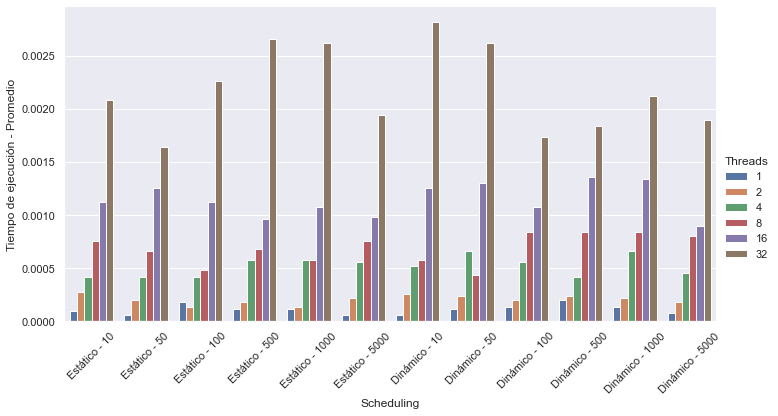

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(18, 18)})

sns.catplot(height=5, aspect=2, x='Scheduling', y='Tiempo de ejecución - Promedio', hue='Threads', data=df_matrix_filtered[(df_matrix_filtered["Tamaño entrada 3"] == 40)], kind='bar', ci=None)
plt.xticks(rotation=45)

In [6]:
df_matrix.to_excel(filename + ".xlsx")